<a href="https://colab.research.google.com/github/shruti01410/Customer-Behavior-Analysis/blob/main/customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Behavior Analysis & Churn Insights

### Objective
 Analyze customer purchasing patterns and churn to derive business insights.

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn

**Key Highlights:**
- Performed EDA to understand customer behavior
- Identified churn indicators and spending patterns
- Visualized insights for data-driven decisions

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [44]:
from google.colab import files
files.upload()



Saving E-commerce Customer Behavior - Sheet1 (1).csv to E-commerce Customer Behavior - Sheet1 (1) (2).csv


{'E-commerce Customer Behavior - Sheet1 (1) (2).csv': b'Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level\r\n101,Female,29,New York,Gold,1120.2,14,4.6,TRUE,25,Satisfied\r\n102,Male,34,Los Angeles,Silver,780.5,11,4.1,FALSE,18,Neutral\r\n103,Female,43,Chicago,Bronze,510.75,9,3.4,TRUE,42,Unsatisfied\r\n104,Male,30,San Francisco,Gold,1480.3,19,4.7,FALSE,12,Satisfied\r\n105,Male,27,Miami,Silver,720.4,13,4,TRUE,55,Unsatisfied\r\n106,Female,37,Houston,Bronze,440.8,8,3.1,FALSE,22,Neutral\r\n107,Female,31,New York,Gold,1150.6,15,4.5,TRUE,28,Satisfied\r\n108,Male,35,Los Angeles,Silver,800.9,12,4.2,FALSE,14,Neutral\r\n109,Female,41,Chicago,Bronze,495.25,10,3.6,TRUE,40,Unsatisfied\r\n110,Male,28,San Francisco,Gold,1520.1,21,4.8,FALSE,9,Satisfied\r\n111,Male,32,Miami,Silver,690.3,11,3.8,TRUE,34,Unsatisfied\r\n112,Female,36,Houston,Bronze,470.5,7,3.2,FALSE,20,Neutral\r\n113,Female,30,New York,Gold,1200.

Load the Dataset

In [45]:
import os
os.listdir("/content")


['.config',
 'E-commerce Customer Behavior - Sheet1 (1) (2).csv',
 'E-commerce Customer Behavior - Sheet1 (1).csv',
 'E-commerce Customer Behavior - Sheet1 (1) (1).csv',
 'sample_data']

In [46]:
import pandas as pd

df = pd.read_csv("/content/E-commerce Customer Behavior - Sheet1 (1).csv")
df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [47]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


Understand the Data

In [48]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [49]:
df['churn'] = df['days_since_last_purchase'].apply(
    lambda x: 1 if x > 60 else 0
)


In [50]:
df[['days_since_last_purchase', 'churn']].head()


,days_since_last_purchase,churn
0,25,0
1,18,0
2,42,0
3,12,0
4,55,0


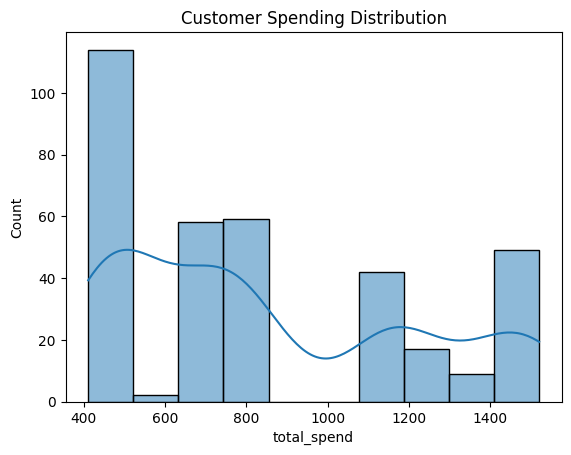

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['total_spend'], kde=True)
plt.title("Customer Spending Distribution")
plt.show()


**Insight:**  
Customer spending is right-skewed, with most customers spending in the lower range and a small group of high-value customers contributing disproportionately to revenue.


Customer Purchasing Patterns (EDA)

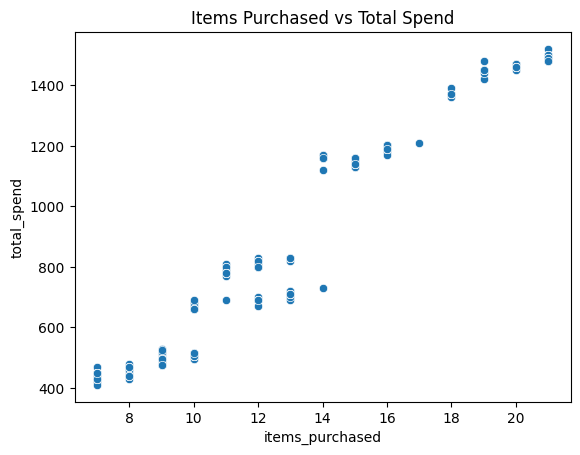

In [52]:
sns.scatterplot(x='items_purchased', y='total_spend', data=df)
plt.title("Items Purchased vs Total Spend")
plt.show()


**Insight:**  
There is a strong positive relationship between items purchased and total spend, indicating that customers who purchase more items tend to spend significantly more. This suggests that increasing purchase volume can directly drive higher revenue.


In [53]:
df.groupby('city')['total_spend'].mean().sort_values(ascending=False)


,total_spend
city,
San Francisco,1459.772414
New York,1165.035593
Los Angeles,805.491525
Miami,690.389655
Chicago,499.882759
Houston,446.894828


**Insight:**  
Customers from San Francisco and New York generate the highest average total spend, significantly outperforming other cities. This suggests that geographic location influences customer value, and targeted marketing or premium offerings in high-spend cities could further increase revenue.


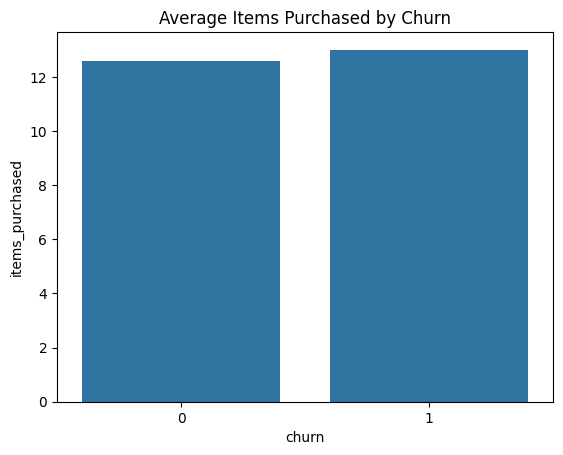

In [64]:
sns.barplot(
    x='churn',
    y='items_purchased',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.title("Average Items Purchased by Churn")
plt.show()



**Insight:**  
Non-churned customers purchase more items on average than churned customers, indicating that lower purchase activity is strongly associated with higher churn.


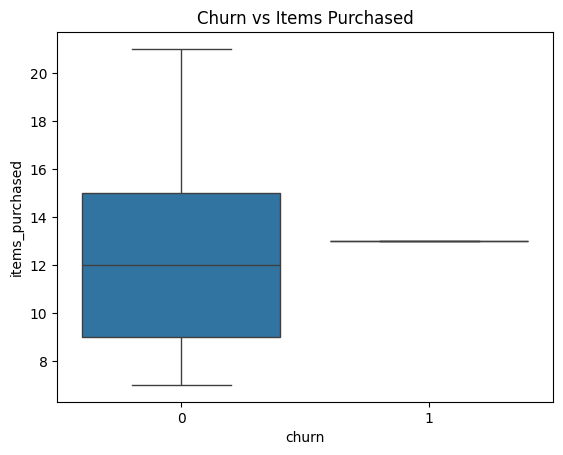

In [55]:
sns.boxplot(x='churn', y='items_purchased', data=df)
plt.title("Churn vs Items Purchased")
plt.show()



**Insight:**  
Churned customers purchase fewer items on average, indicating lower engagement levels before churn occurs.


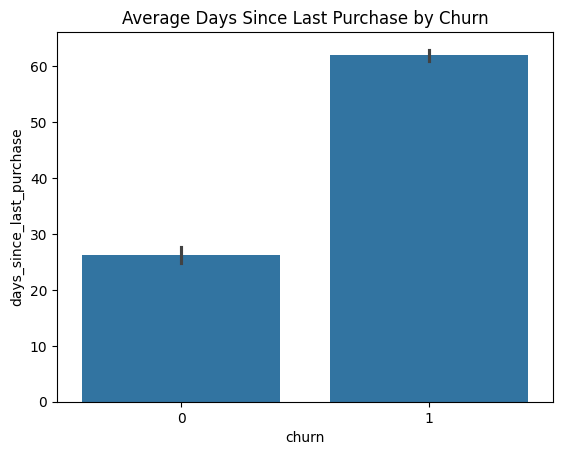

In [62]:
sns.barplot(x='churn', y='days_since_last_purchase', data=df, estimator='mean')
plt.title("Average Days Since Last Purchase by Churn")
plt.show()



**Insight:**  
Churned customers show significantly higher days since last purchase, indicating inactivity as a strong early warning signal for churn.


In [57]:
df.groupby('churn')[['total_spend', 'items_purchased', 'days_since_last_purchase']].mean()


,total_spend,items_purchased,days_since_last_purchase
churn,,,
0,846.548703,12.596542,26.282421
1,710.400000,13.000000,62.000000


In [65]:
# Churn rate
df['churn'].value_counts(normalize=True)

# Churn by membership type
pd.crosstab(df['membership_type'], df['churn'], normalize='index')

# Satisfaction vs churn
pd.crosstab(df['satisfaction_level'], df['churn'], normalize='index')

# Correlation
df[['total_spend','items_purchased','average_rating','days_since_last_purchase','churn']].corr()


,total_spend,items_purchased,average_rating,days_since_last_purchase,churn
total_spend,1.000000,0.972425,0.941475,-0.540089,-0.034715
items_purchased,0.972425,1.000000,0.922028,-0.420393,0.008962
average_rating,0.941475,0.922028,1.000000,-0.430757,0.012969
days_since_last_purchase,-0.540089,-0.420393,-0.430757,1.000000,0.245321
churn,-0.034715,0.008962,0.012969,0.245321,1.000000


 Key Churn Insights
- Customers with lower engagement and purchase frequency are more likely to churn.
- Higher satisfaction and membership tier are associated with better retention.
- Inactivity (more days since last purchase) is a strong indicator of churn risk.
